# Data Preparation:
Two sets of data:
  

*   The first one is among variables with same PC number (re: reversed)
```
df_all
df_all_re
```

*   The second one is within variable crossing PCs
```
df_msl 
df_si10 
df_sst
df_t2m
```



In [1]:
# ! python3.6 -m pip install scipy==1.2 imgaug==0.2.5 --upgrade
# ! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels

# !pip3 install --user scipy==1.2.0

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-9ta6_ic2
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-9ta6_ic2
  Stored in directory: /tmp/pip-ephem-wheel-cache-oedzbobk/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
# Granger Causality among PCs cross variables

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa import stattools
from graphviz import Digraph
from google.colab import files

# dictionary for cross variables GC graph
data_sets = {}
df_dict = {}

list_msl = list()

for loop_pcs_4v in range(0,30):
    create_df_cols = locals()
    
    # dealing with "00, 01, 02, ..."
    if loop_pcs_4v < 10:
        file_name_str = '0%s' % str(loop_pcs_4v)
    else:
        file_name_str = str(loop_pcs_4v)
        
    data_sets['sst_%s' % file_name_str] = pd.read_csv('eof_ts_sst-%s' % file_name_str,header=None,names=['sst_%s' % file_name_str])
    data_sets['msl_%s' % file_name_str] = pd.read_csv('eof_ts_msl-%s' % file_name_str,header=None,names=['msl_%s' % file_name_str])
    data_sets['si10_%s' % file_name_str] = pd.read_csv('eof_ts_si10-%s' % file_name_str,header=None,names=['si10_%s' % file_name_str])
    data_sets['t2m_%s' % file_name_str] = pd.read_csv('eof_ts_t2m-%s' % file_name_str,header=None,names=['t2m_%s' % file_name_str])

df_msl    = pd.concat([data_sets['msl_01'],data_sets['msl_02'],data_sets['msl_03'],data_sets['msl_04'],data_sets['msl_06'],data_sets['msl_07']],axis=1)
df_msl_re = pd.concat([data_sets['msl_07'],data_sets['msl_06'],data_sets['msl_04'],data_sets['msl_03'],data_sets['msl_02'],data_sets['msl_01']],axis=1)

df_si10    = pd.concat([data_sets['si10_00'],data_sets['si10_01'],data_sets['si10_04'],data_sets['si10_05'],data_sets['si10_06'],data_sets['si10_07']],axis=1)
df_si10_re = pd.concat([data_sets['si10_07'],data_sets['si10_06'],data_sets['si10_05'],data_sets['si10_04'],data_sets['si10_01'],data_sets['si10_00']],axis=1)

df_sst    = pd.concat([data_sets['sst_00'],data_sets['sst_03'],data_sets['sst_04'],data_sets['sst_05'],data_sets['sst_06'],data_sets['sst_07']],axis=1)
df_sst_re = pd.concat([data_sets['sst_07'],data_sets['sst_06'],data_sets['sst_05'],data_sets['sst_04'],data_sets['sst_03'],data_sets['sst_00']],axis=1)

df_t2m    = pd.concat([data_sets['t2m_02'],data_sets['t2m_03'],data_sets['t2m_04'],data_sets['t2m_06'],data_sets['t2m_07'],data_sets['t2m_08']],axis=1)
df_t2m_re = pd.concat([data_sets['t2m_08'],data_sets['t2m_07'],data_sets['t2m_06'],data_sets['t2m_04'],data_sets['t2m_03'],data_sets['t2m_02']],axis=1)

df_all = pd.concat([data_sets['msl_01'],data_sets['msl_02'],data_sets['msl_03'],data_sets['msl_04'],data_sets['msl_06'],data_sets['msl_07'],
                    data_sets['si10_00'],data_sets['si10_01'],data_sets['si10_04'],data_sets['si10_05'],data_sets['si10_06'],data_sets['si10_07'],
                    data_sets['sst_00'],data_sets['sst_03'],data_sets['sst_04'],data_sets['sst_05'],data_sets['sst_06'],data_sets['sst_07'],
                    data_sets['t2m_02'],data_sets['t2m_03'],data_sets['t2m_04'],data_sets['t2m_06'],data_sets['t2m_07'],data_sets['t2m_08']], axis=1)

df_all_re = pd.concat([data_sets['msl_07'],data_sets['msl_06'],data_sets['msl_04'],data_sets['msl_03'],data_sets['msl_02'],data_sets['msl_01'],
                       data_sets['si10_07'],data_sets['si10_06'],data_sets['si10_05'],data_sets['si10_04'],data_sets['si10_01'],data_sets['si10_00'],
                       data_sets['sst_07'],data_sets['sst_06'],data_sets['sst_05'],data_sets['sst_04'],data_sets['sst_03'],data_sets['sst_00'],
                       data_sets['t2m_08'],data_sets['t2m_07'],data_sets['t2m_06'],data_sets['t2m_04'],data_sets['t2m_03'],data_sets['t2m_02']],axis=1)


# print(df_0.shape)
# print(df_dict["df_4"]["msl_4"])
# print(df_msl)
                                                                                                               
# print(df_all_re)

## Load graphviz python package

In [0]:
!pip install graphviz
!apt-get install graphviz xdg-utils -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
xdg-utils is already the newest version (1.1.2-1ubuntu2.3).
xdg-utils set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


# Causality Tests


## Granger_automated function

In [0]:
def Granger_automated(maxlag):
    temp_p = 1
    temp_p_re = 1
    temp_lag = -1
    temp_lag_re = -1
    firstptr = 0
    end = len(data.columns)
    while firstptr < end:
        secondptr = firstptr
        while secondptr < end:
            # test for B→A, reversed is A→B
            # note: vA = caused = effect
            variableA = data[data.columns[firstptr]].tolist()
            # note: vB = causing = cause
            variableB = data[data.columns[secondptr]].tolist()
            combined_vector = []
            reversed_combined_vector = []
            for i in range(len(variableA)):
                combined_vector.append((variableA[i], variableB[i]))
                reversed_combined_vector.append((variableB[i], variableA[i]))
#             print("Check results in 'Results': Checking for {} -2ndptr- can granger cause {} -1stptr-".format(data.columns[secondptr],data.columns[firstptr]))
            print("Check results in 'Results': Checking for {} can granger cause {}".format(data.columns[secondptr],data.columns[firstptr]))
            results = stattools.grangercausalitytests(combined_vector, maxlag, addconst=True, verbose=False)
#             print("Check results in 'Reversed_Results': Checking for {} -1stptr- can granger cause {} -2ndptr-".format(data.columns[firstptr],data.columns[secondptr]))
            print("Check results in 'Reversed_Results': Checking for {} can granger cause {}".format(data.columns[firstptr],data.columns[secondptr]))
            reversed_results = stattools.grangercausalitytests(reversed_combined_vector, maxlag, addconst=True, verbose=False)
            # count is timelag
            # draw the graph
            for count in range(1,maxlag+1):
                for tupleItems in results[count]:
                    if isinstance(tupleItems, dict):
                        for key, value in tupleItems.items():
                            if key == "ssr_ftest" and value[1] < 0.05:
                                print("\n------------------------""Results""")
                                print(key)
                                print("{} Lag rejected H0, with p = {}".format(count, value[1]))
                                if value[1] < temp_p:
                                  temp_p = value[1]
                                  print(temp_p)
                                  temp_lag = count
                                  print(temp_lag)
                                g.edge(data.columns[secondptr],data.columns[firstptr],label = " {} ".format(temp_lag))
                                
                                # save the smallest p 
                                res_pair_name = str(data.columns[firstptr])+str(data.columns[secondptr])
                                if res_pair_name not in result:
                                    result[res_pair_name] = 1
                                if temp_p < result[res_pair_name]:
                                    result[res_pair_name] = temp_p
                                    output.append((str(data.columns[firstptr]+data.columns[secondptr]),temp_lag,temp_p,"GC"))
                                    print("output is ")
                                    print(output)
                                print("finish saving p and lag as (results df )")
                                print(temp_p)
                                print(temp_lag)
                                if firstptr != secondptr:
                                    edgegranger.append((data.columns[secondptr],data.columns[firstptr]))
                
                for tupleItems_re in reversed_results[count]:
                    if isinstance(tupleItems_re, dict):
                        for key_re, value_re in tupleItems_re.items():
                            if key_re == "ssr_ftest" and value_re[1] < 0.05:
                                print("\n------------------------""Reversed_Results""")
                                print(key_re)
                                print("{} Lag rejected H0, with p = {}".format(count, value_re[1]))
                                if value_re[1] < temp_p_re:
                                  temp_p_re = value_re[1]
                                  print(temp_p_re)
                                  temp_lag_re = count
                                  print(temp_lag_re)
                                print("finish saving p and lag as (results_re)")
                                print(temp_p_re)
                                print(temp_lag_re)
                                g.edge(data.columns[firstptr],data.columns[secondptr],label = " {} ".format(temp_lag_re))
                                res_re_pair_name = str(data.columns[secondptr])+str(data.columns[firstptr])
                                print(res_re_pair_name)
                                res_re_pair_name_str = "{},{} result".format(str(data.columns[secondptr]),str(data.columns[firstptr]))
                                if res_re_pair_name not in result:
                                    result[res_re_pair_name] = 1
                                if temp_p_re < result[res_re_pair_name]:
                                    result[res_re_pair_name] = temp_p_re
                                    print("result[res_re_pair_name] is")
                                    print(result[res_re_pair_name])
                                    output.append((str(data.columns[secondptr]+data.columns[firstptr]),temp_lag_re,value_re[1],"GC"))
                                    print(data.columns[secondptr]+data.columns[firstptr])
                                    print("output is ")
                                    print(output)
#                                 result.append((data.columns[secondptr],data.columns[firstptr],temp_lag,value[1],"GC"))
                                if firstptr != secondptr:
                                    edgegranger.append((data.columns[firstptr],data.columns[secondptr]))
            temp_p = 1
            temp_lag = -1
            temp_p_re = 1
            temp_lag_re = -1  
            print("=========-------==========")
            secondptr += 1
        firstptr += 1


## **Causality test for all variables**

Check results in 'Results': Checking for msl_01 can granger cause msl_01
Check results in 'Reversed_Results': Checking for msl_01 can granger cause msl_01
=========-------==========
Check results in 'Results': Checking for msl_02 can granger cause msl_01
Check results in 'Reversed_Results': Checking for msl_01 can granger cause msl_02

------------------------Results
ssr_ftest
1 Lag rejected H0, with p = 0.00020400599891383026
0.00020400599891383026
1
output is 
[('msl_01msl_02', 1, 0.00020400599891383026, 'GC')]
finish saving p and lag as (results df )
0.00020400599891383026
1

------------------------Reversed_Results
ssr_ftest
1 Lag rejected H0, with p = 0.00037594272750095573
0.00037594272750095573
1
finish saving p and lag as (results_re)
0.00037594272750095573
1
msl_02msl_01
result[res_re_pair_name] is
0.00037594272750095573
msl_02msl_01
output is 
[('msl_01msl_02', 1, 0.00020400599891383026, 'GC'), ('msl_02msl_01', 1, 0.00037594272750095573, 'GC')]

------------------------Result

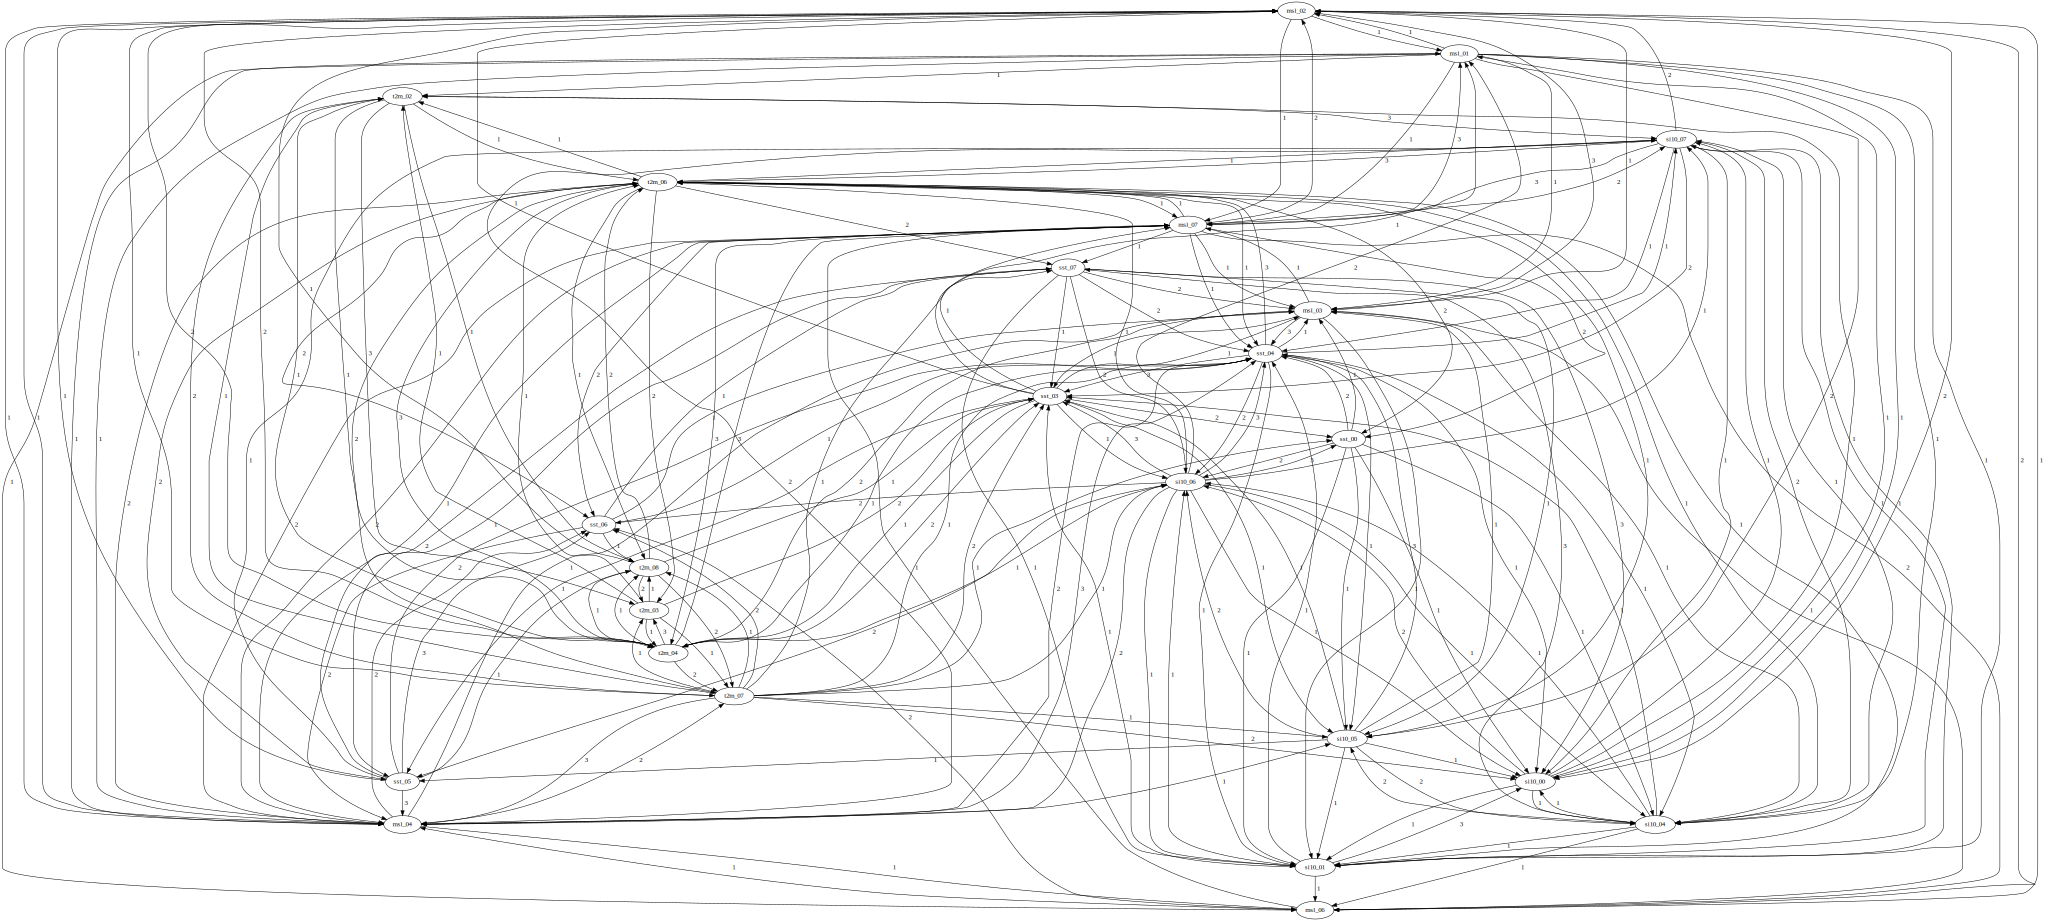

In [4]:
g = Digraph('G', filename='granger_all_new.gv', strict=True)
edgegranger = []
data = df_all
result = {}
output = []

Granger_automated(3)
print(result)
print(output)

output_df = pd.DataFrame(output)
output_df.columns = ['Effect-Node-Cause-Node', 'Time-Lag', 'Strength', 'Method']
output_df = output_df.sort_values(by=['Strength'])
output_df = output_df.drop_duplicates(subset=['Effect-Node-Cause-Node'], keep="first")

print(output_df.head(20))

output_df.head(20).to_csv("all_20.csv",index=False)
output_df.to_csv("all.csv",index=False)

files.download('all.csv') 
files.download('all_20.csv') 

print(g)
print(g.view())
g

## Run Causality test and generate graph for sst

Check results in 'Results': Checking for sst_00 can granger cause sst_00
Check results in 'Reversed_Results': Checking for sst_00 can granger cause sst_00
=========-------==========
Check results in 'Results': Checking for sst_03 can granger cause sst_00
Check results in 'Reversed_Results': Checking for sst_00 can granger cause sst_03

------------------------Results
ssr_ftest
2 Lag rejected H0, with p = 0.015345676799297695
0.015345676799297695
2
output is 
[('sst_00sst_03', 2, 0.015345676799297695, 'GC')]
finish saving p and lag as (results df )
0.015345676799297695
2

------------------------Results
ssr_ftest
3 Lag rejected H0, with p = 0.047923071679829815
finish saving p and lag as (results df )
0.015345676799297695
2
=========-------==========
Check results in 'Results': Checking for sst_04 can granger cause sst_00
Check results in 'Reversed_Results': Checking for sst_00 can granger cause sst_04

------------------------Reversed_Results
ssr_ftest
2 Lag rejected H0, with p = 0.033

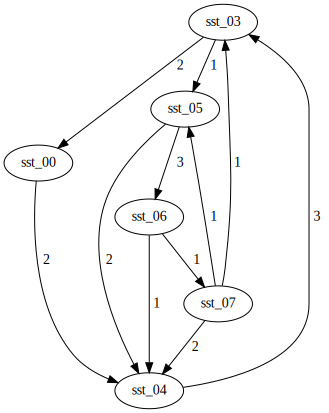

In [5]:
g = Digraph('G', filename='granger_sst_new.gv', strict=True)
edgegranger = []
data = df_sst
result = {}
output = []

Granger_automated(3)
print(result)
print(output)

output_df = pd.DataFrame(output)
output_df.columns = ['Effect-Node-Cause-Node', 'Time-Lag', 'Strength', 'Method']
output_df = output_df.sort_values(by=['Strength'])
output_df = output_df.drop_duplicates(subset=['Effect-Node-Cause-Node'], keep="first")

print(output_df.head(20))

output_df.head(20).to_csv("sst_20.csv",index=False)
output_df.to_csv("sst.csv",index=False)

files.download('sst.csv') 
files.download('sst_20.csv') 

print(g)
print(g.view())
g

## Run Causality test and generate graph for msl

Check results in 'Results': Checking for msl_01 can granger cause msl_01
Check results in 'Reversed_Results': Checking for msl_01 can granger cause msl_01
=========-------==========
Check results in 'Results': Checking for msl_02 can granger cause msl_01
Check results in 'Reversed_Results': Checking for msl_01 can granger cause msl_02

------------------------Results
ssr_ftest
1 Lag rejected H0, with p = 0.00020400599891383026
0.00020400599891383026
1
output is 
[('msl_01msl_02', 1, 0.00020400599891383026, 'GC')]
finish saving p and lag as (results df )
0.00020400599891383026
1

------------------------Reversed_Results
ssr_ftest
1 Lag rejected H0, with p = 0.00037594272750095573
0.00037594272750095573
1
finish saving p and lag as (results_re)
0.00037594272750095573
1
msl_02msl_01
result[res_re_pair_name] is
0.00037594272750095573
msl_02msl_01
output is 
[('msl_01msl_02', 1, 0.00020400599891383026, 'GC'), ('msl_02msl_01', 1, 0.00037594272750095573, 'GC')]

------------------------Result

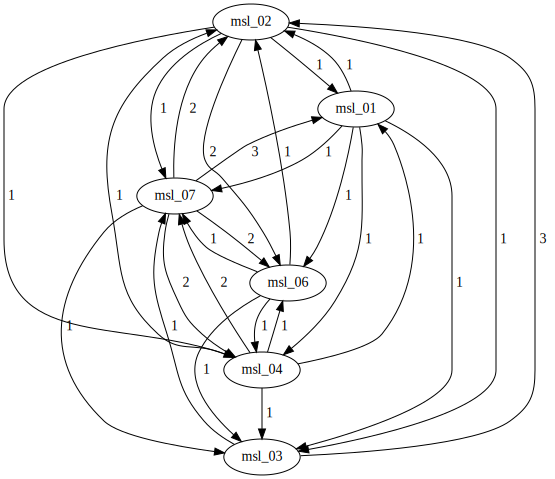

In [6]:
from statsmodels.tsa import stattools
from graphviz import Digraph

g = Digraph('G', filename='granger_msl_new.gv', strict=True)
edgegranger = []
data = df_msl
result = {}
output = []


Granger_automated(3)
print(result)
print(output)

output_df = pd.DataFrame(output)
output_df.columns = ['Effect-Node-Cause-Node', 'Time-Lag', 'Strength', 'Method']
output_df = output_df.sort_values(by=['Strength'])
output_df = output_df.drop_duplicates(subset=['Effect-Node-Cause-Node'], keep="first")

print(output_df.head(20))

output_df.head(20).to_csv("msl_20.csv",index=False)
output_df.to_csv("msl.csv",index=False)

files.download('msl.csv') 
files.download('msl_20.csv') 

print(g)
print(g.view())
g

## Run Causality test and generate graph for t2m

Check results in 'Results': Checking for t2m_02 can granger cause t2m_02
Check results in 'Reversed_Results': Checking for t2m_02 can granger cause t2m_02
=========-------==========
Check results in 'Results': Checking for t2m_03 can granger cause t2m_02
Check results in 'Reversed_Results': Checking for t2m_02 can granger cause t2m_03

------------------------Results
ssr_ftest
1 Lag rejected H0, with p = 1.74658837875828e-06
1.74658837875828e-06
1
output is 
[('t2m_02t2m_03', 1, 1.74658837875828e-06, 'GC')]
finish saving p and lag as (results df )
1.74658837875828e-06
1

------------------------Reversed_Results
ssr_ftest
1 Lag rejected H0, with p = 1.386644287275936e-08
1.386644287275936e-08
1
finish saving p and lag as (results_re)
1.386644287275936e-08
1
t2m_03t2m_02
result[res_re_pair_name] is
1.386644287275936e-08
t2m_03t2m_02
output is 
[('t2m_02t2m_03', 1, 1.74658837875828e-06, 'GC'), ('t2m_03t2m_02', 1, 1.386644287275936e-08, 'GC')]

------------------------Results
ssr_ftest
2 L

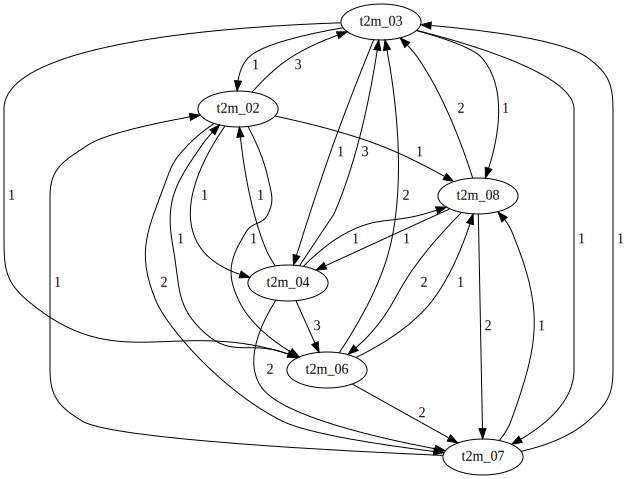

In [7]:
g = Digraph('G', filename='granger_t2m_new.gv', strict=True)
edgegranger = []
data = df_t2m
result = {}
output = []


Granger_automated(3)
print(result)
print(output)

output_df = pd.DataFrame(output)
output_df.columns = ['Effect-Node-Cause-Node', 'Time-Lag', 'Strength', 'Method']
output_df = output_df.sort_values(by=['Strength'])
output_df = output_df.drop_duplicates(subset=['Effect-Node-Cause-Node'], keep="first")

print(output_df.head(20))

output_df.head(20).to_csv("t2m_20.csv",index=False)
output_df.to_csv("t2m.csv",index=False)

files.download('t2m.csv') 
files.download('t2m_20.csv') 

print(g)
print(g.view())
g

## Run Causality test and generate graph for si10

Check results in 'Results': Checking for si10_00 can granger cause si10_00
Check results in 'Reversed_Results': Checking for si10_00 can granger cause si10_00
=========-------==========
Check results in 'Results': Checking for si10_01 can granger cause si10_00
Check results in 'Reversed_Results': Checking for si10_00 can granger cause si10_01

------------------------Results
ssr_ftest
1 Lag rejected H0, with p = 1.148991671486998e-05
1.148991671486998e-05
1
output is 
[('si10_00si10_01', 1, 1.148991671486998e-05, 'GC')]
finish saving p and lag as (results df )
1.148991671486998e-05
1

------------------------Reversed_Results
ssr_ftest
1 Lag rejected H0, with p = 0.0006895634290076805
0.0006895634290076805
1
finish saving p and lag as (results_re)
0.0006895634290076805
1
si10_01si10_00
result[res_re_pair_name] is
0.0006895634290076805
si10_01si10_00
output is 
[('si10_00si10_01', 1, 1.148991671486998e-05, 'GC'), ('si10_01si10_00', 1, 0.0006895634290076805, 'GC')]

----------------------

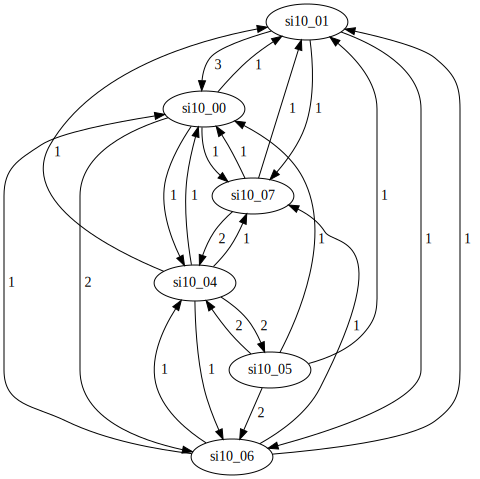

In [8]:
g = Digraph('G', filename='granger_si10_new.gv', strict=True)
edgegranger = []
data = df_si10
result = {}
output = []


Granger_automated(3)
print(result)
print(output)

output_df = pd.DataFrame(output)
output_df.columns = ['Effect-Node-Cause-Node', 'Time-Lag', 'Strength', 'Method']
output_df = output_df.sort_values(by=['Strength'])
output_df = output_df.drop_duplicates(subset=['Effect-Node-Cause-Node'], keep="first")
print(output_df.head(20))
output_df.head(20).to_csv("si10_20.csv",index=False)
output_df.to_csv("si10.csv",index=False)

files.download('si10.csv') 
files.download('si10_20.csv') 

print(g)
print(g.view())
g

# Previous Code (please ignore :))

In [0]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.tsa.api import VAR, DynamicVAR

# df_sst_m = pd.read_csv('sst-K-2004-2016-monthly',header=None,names=['sst'])

# df_t2m_m = pd.read_csv('t2m-K-2004-2016-monthly',header=None,names=['t2m']) 

# # df = [df_sst,df_t2m]
# df_test = pd.concat([df_sst, df_t2m], axis=1)

# print(df_test.shape)

# df_test.index = pd.date_range('2004-01-01', periods=156, freq='M')


# model = VAR(df_test)
# results=model.fit(7)
# results.summary()

In [0]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.tsa.api import VAR, DynamicVAR

# df_sst_d = pd.read_csv('sst-K-2004-2016-daily-detrend-Original',header=None,names=['sst'])
# df_t2m_d = pd.read_csv('t2m-K-2004-2016-daily-detrend-Original',header=None,names=['t2m']) 
# df_msl_d = pd.read_csv('msl-K-2004-2016-daily-detrend-Original',header=None,names=['msl'])
# df_tcc_d = pd.read_csv('tcc-K-2004-2016-daily-detrend-Original',header=None,names=['tcc'])
# df_hcc_d = pd.read_csv('hcc-K-2004-2016-daily-detrend-Original',header=None,names=['hcc'])
# df_siconc_d = pd.read_csv('siconc-K-2004-2016-daily-detrend-Original',header=None,names=['siconc'])


# df = pd.concat([df_sst_d, df_t2m_d, df_msl_d, df_tcc_d, df_hcc_d, df_siconc_d], axis=1)

# # print(df.shape)

# df.index = pd.date_range('2004-01-01', periods=4749, freq='d')

# model = VAR(df)

# print(model.select_order(90))

# results=model.fit(30)
# results.summary()

In [0]:
# test causality among PCs, PC0

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR


msl_0 = pd.read_csv('eof_ts-msl-0',header=None,names=['msl_0'])
si10_0 = pd.read_csv('eof_ts-si10-0',header=None,names=['si10_0']) 
sst_0 = pd.read_csv('eof_ts-sst-0',header=None,names=['sst_0'])
t2m_0 = pd.read_csv('eof_ts-t2m-0',header=None,names=['t2m_0'])

df = pd.concat([msl_0, si10_0, sst_0, t2m_0], axis=1)
print(df.shape)
print(df)
# df.index = pd.date_range('1979-01-01', periods=480, freq='m')
# model = VAR(df)

# print(model.select_order(3))

# results=model.fit(3)
# results.summary()

(480, 4)
        msl_0    si10_0     sst_0     t2m_0
0   -1.215873 -1.172524 -1.086278 -1.433373
1   -0.800490 -1.079570 -1.353389 -1.320438
2   -0.663839 -0.878938 -1.336088 -0.732428
3    0.060778 -0.317605 -1.034210 -0.115236
4    0.591301  0.469027 -0.448188  0.624585
5    1.149656  1.224949  0.351422  1.148646
6    1.285100  1.461048  1.072096  1.443345
7    1.011643  1.359845  1.492715  1.307181
8    0.276190  0.901955  1.358172  0.898745
9   -0.271389 -0.012857  0.825516  0.203102
10  -0.853308 -0.657597  0.155917 -0.607794
11  -1.029051 -1.142382 -0.542755 -1.099754
12  -1.417894 -1.199962 -1.042331 -1.576711
13  -1.545467 -1.254673 -1.327294 -1.335802
14  -0.679026 -0.743597 -1.314916 -0.930977
15  -0.001070 -0.389694 -0.996671 -0.212394
16   0.655845  0.475876 -0.445531  0.503078
17   1.184108  1.204533  0.331482  1.069992
18   1.482490  1.507236  1.050050  1.300329
19   1.159804  1.500916  1.459745  1.216566
20   0.388758  0.844468  1.326760  0.757619
21  -0.368656  0.017472

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR


data_sets = {}
for loop_pcs_4v in range(0,30):
    create_df_cols = locals()
#     create_df_cols['msl_' + str(loop_pcs_4v)] = pd.read_csv('eof_ts-msl-%s' % (str(loop_pcs_4v)),header=None,names=['msl_%s' % str(loop_pcs_4v)])
#     create_df_cols['si10_' + str(loop_pcs_4v)] = pd.read_csv('eof_ts-si10-%s' % (str(loop_pcs_4v)),header=None,names=['si10_%s' % str(loop_pcs_4v)])
#     create_df_cols['sst_' + str(loop_pcs_4v)] = pd.read_csv('eof_ts-sst-%s' % (str(loop_pcs_4v)),header=None,names=['sst_%s' % str(loop_pcs_4v)])
#     create_df_cols['t2m_' + str(loop_pcs_4v)] = pd.read_csv('eof_ts-t2m-%s' % (str(loop_pcs_4v)),header=None,names=['t2m_%s' % str(loop_pcs_4v)])
        
#     data_sets = {'msl_%s' % str(loop_pcs_4v): pd.read_csv('eof_ts-msl-%s' % (str(loop_pcs_4v)),header=None,names=['msl_%s' % str(loop_pcs_4v)]),
#                 'si10_' + str(loop_pcs_4v): pd.read_csv('eof_ts-si10-%s' % (str(loop_pcs_4v)),header=None,names=['si10_%s' % str(loop_pcs_4v)]),
#                  'sst_' + str(loop_pcs_4v): pd.read_csv('eof_ts-sst-%s' % (str(loop_pcs_4v)),header=None,names=['sst_%s' % str(loop_pcs_4v)]),
#                  't2m_' + str(loop_pcs_4v): pd.read_csv('eof_ts-t2m-%s' % (str(loop_pcs_4v)),header=None,names=['t2m_%s' % str(loop_pcs_4v)])
#                 }
    
    data_sets['msl_%s' % str(loop_pcs_4v)] = pd.read_csv('eof_ts-msl-%s' % (str(loop_pcs_4v)),header=None,names=['msl_%s' % str(loop_pcs_4v)])
    data_sets['si10_%s' % str(loop_pcs_4v)] = pd.read_csv('eof_ts-si10-%s' % (str(loop_pcs_4v)),header=None,names=['si10_%s' % str(loop_pcs_4v)])
#     print(data_sets["msl_16"])

    create_df_cols['df_' + str(loop_pcs_4v)] = pd.concat([data_sets['msl_%s' % str(loop_pcs_4v)], data_sets['si10_%s' % str(loop_pcs_4v)]], axis =1)

  
print(df_0)       
#     df_0 = pd.concat([msl_0, si10_0, sst_0, t2m_0], axis =1)
    
#     create_df_cols['df_' + str(loop_pcs_4v)] = pd.concat(['msl_%s' % str(loop_pcs_4v)], axis =1)
    
#     dfObj = pd.DataFrame(pd.read_csv('eof_ts-msl-%s' % (str(loop_pcs_4v)),header=None,names=['msl_%s' % str(loop_pcs_4v)]))
    
    
#     dfObj = pd.DataFrame(students, columns = ['Name' , 'Age', 'City'], index=['a', 'b', 'c'])


# import os
# big_frame = pd.DataFrame()

# for file in os.listdir():
#     if file.startswith('eof'):
#         print("======round=====")
#         print(file)
#         df = pd.read_csv(file,header=None,names=[file])
#         print(df.shape)
#         print(df)
#         big_frame = big_frame.append(df, ignore_index=True, sort=False)
       
#         print(big_frame)

# print(big_frame.shape)

# df_0 = pd.concat([msl_0, si10_0, sst_0, t2m_0], axis =1)
# df_1 = pd.concat([msl_1, si10_1, sst_1, t2m_1], axis =1)
# df_2 = pd.concat([msl_2, si10_2, sst_2, t2m_2], axis =1)
# df_3 = pd.concat([msl_3, si10_3, sst_3, t2m_3], axis =1)
# df_4 = pd.concat([msl_4, si10_4, sst_4, t2m_4], axis =1)
# df_5 = pd.concat([msl_5, si10_5, sst_5, t2m_5], axis =1)
# df_6 = pd.concat([msl_6, si10_6, sst_6, t2m_6], axis =1)
# df_7 = pd.concat([msl_7, si10_7, sst_7, t2m_7], axis =1)
# df_8 = pd.concat([msl_8, si10_8, sst_8, t2m_8], axis =1)
# df_9 = pd.concat([msl_9, si10_9, sst_9, t2m_9], axis =1)
# df_10 = pd.concat([msl_10, si10_10, sst_10, t2m_10], axis =1)
# df_11 = pd.concat([msl_11, si10_11, sst_11, t2m_11], axis =1)
# df_12 = pd.concat([msl_12, si10_12, sst_12, t2m_12], axis =1)
# df_13 = pd.concat([msl_13, si10_13, sst_13, t2m_13], axis =1)
# df_14 = pd.concat([msl_14, si10_14, sst_14, t2m_14], axis =1)
# df_15 = pd.concat([msl_15, si10_15, sst_15, t2m_15], axis =1)
# df_16 = pd.concat([msl_16, si10_16, sst_16, t2m_16], axis =1)
# df_17 = pd.concat([msl_17, si10_17, sst_17, t2m_17], axis =1)
# df_18 = pd.concat([msl_18, si10_18, sst_18, t2m_18], axis =1)
# df_19 = pd.concat([msl_19, si10_19, sst_19, t2m_19], axis =1)
# df_20 = pd.concat([msl_20, si10_20, sst_20, t2m_20], axis =1)
# df_21 = pd.concat([msl_21, si10_21, sst_21, t2m_21], axis =1)
# df_22 = pd.concat([msl_22, si10_22, sst_22, t2m_22], axis =1)
# df_23 = pd.concat([msl_23, si10_23, sst_23, t2m_23], axis =1)
# df_24 = pd.concat([msl_24, si10_24, sst_24, t2m_24], axis =1)
# df_25 = pd.concat([msl_25, si10_25, sst_25, t2m_25], axis =1)
# df_26 = pd.concat([msl_26, si10_26, sst_26, t2m_26], axis =1)
# df_27 = pd.concat([msl_27, si10_27, sst_27, t2m_27], axis =1)
# df_28 = pd.concat([msl_28, si10_28, sst_28, t2m_28], axis =1)
# df_29 = pd.concat([msl_29, si10_29, sst_29, t2m_29], axis =1)
# df_30 = pd.concat([msl_30, si10_30, sst_30, t2m_30], axis =1)

# print(df_15)
# print(df_28)    
# # create_df_cols['df_' + str(loop_pcs_4v)] = pd.concat([msl_0, si10_0, sst_0], axis =1)
